# KNN Implementation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [129]:
def plot_data(data_points):
    '''
    Takes the data points as input.
    if class == 0, plots red o.
    if class == 1, plots black x.
    '''
    class_labels = ["+","o"]
    for i in range(data_points.shape[0]):
        x = data_points[i][0]
        y = data_points[i][1]
        if(int(data_points[i][2])==0):
            label = 'ro'
        if(int(data_points[i][2])==1):
            label = 'kx'
        
        plt.plot(x,y,label)
    plt.axis('square')
    plt.show()

In [130]:
def euc_dist(data_set, new_pt):
    '''
    Takes the data_set and the new point as input.
    Returns a list containing the distance from the new point to all the points in the dataset
    '''    
    dist = np.random.rand(data_set.shape[0]) # initialize a random list of the same size as the number of points in the data_set
    
    new_x = new_pt[0] # x val of the new point
    new_y = new_pt[1] # y val of the new point
    
    for i in range(data_set.shape[0]):
        x = data_set[i][0] # x val of point i
        y = data_set[i][1] # y val of point i
        
        d = np.sqrt( (new_y - y)**2 + (new_x - x)**2 ) # distance between point i and new_pt
        dist[i] = d
    return dist      

In [116]:
def assign_class(data_set, indices):
    '''
    Function to assign a class to the new point based on the classes of the k closest points
    Takes the data_set and the list of k indics as input. 
    The indices are the positions of the nearest neighbors in the dataset.
    '''
    count_class = [0,0] # Position 0 = number of nearest neighbors having class 0. Position 1 = number of nearest neighbors having class 1.
    for i in indices:
        c = int(data_set[i][2]) 
        count_class[c] += 1
    return np.argmax(count_class)        

In [135]:
def knn(new_pt, data_set,  k=1):
    '''
    Takes the new point and k as input. 
    Calculates it's euclidean distance to all the existing points.
    Take the k closest points.
    the class that occures maximum number of times get's assigned to the new point.
    '''
    dist = euc_dist(data_set, new_pt)
    indices = dist.argsort()[:k] # argsort() is a numpy function that Returns the indices that would sort this array. We are taking the first k indices.
    c = assign_class(data_set, indices)
    return np.append(data_set,[[new_pt[0], new_pt[1],c]], axis = 0), c    # returns the new point with the assigned class

In [149]:
# Input points
data_set = np.array([[0.5,0.5,0],[0.75,0.25,0],[0.25,0.75,0],[1,1,0],[2,2,0],
                     [-2,-2,1],[-0.25,-0.25,1],[-1.5,-2.5,1],[-3,-2,1],[-2,-3,1]]) # every point is of the format [x,y,class]. Here class is either 0 or 1.

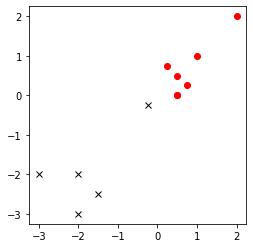

The assigned class to the new point is: 0


In [150]:
new_pt = [0.5,0]
data_set, point_class = knn(new_pt,data_set, k=1)
plot_data(data_set)
print("The assigned class to the new point is: {}".format(point_class))